<a href="https://colab.research.google.com/github/Madhavaraj-s-p/Madhavaraj-s-p/blob/main/Logistic_Reg_insurance_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance By Age Using Logistics Regression

Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


Loading a dataset

In [ ]:
ins = pd.read_csv('/content/insurance_data.csv')

In [ ]:
ins.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Ploting a Graph

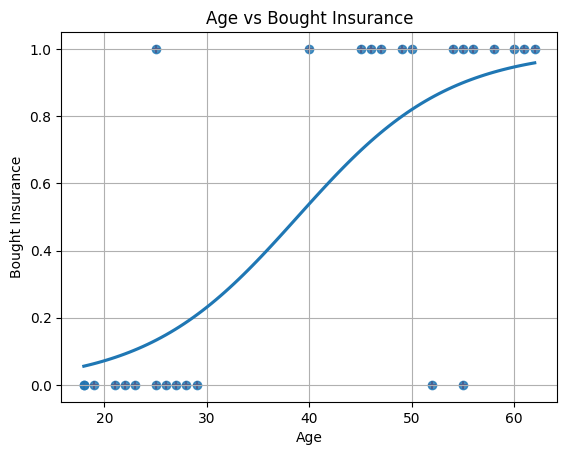

In [ ]:
fig,ax = plt.subplots()
ax.scatter(ins.age,ins.bought_insurance,marker = '+',color = 'red')
sns.regplot(x="age", y="bought_insurance", data = ins, logistic=True,ci = None)
ax.set_title('Age vs Bought Insurance')
ax.set_xlabel('Age')
ax.set_ylabel('Bought Insurance')
ax.grid()

Train Test Split

In [ ]:
X = ins[['age']] #feature - Independent Variable
y = ins.bought_insurance #label - Dependent Variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .1,shuffle = True,random_state = 36)

In [ ]:
Test_Series  = pd.DataFrame()
Test_Series['Age'] = X_test
Test_Series['Bought_Insurance'] = y_test
Test_Series

,Age,Bought_Insurance
17,58,1
11,28,0
7,60,1


Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Predicting

In [ ]:
lr.predict([[60]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
Predicted = pd.DataFrame()
Predicted['Age'] = X_test
Predicted['Actual Bought Insurance'] = y_test
y_pred = lr.predict(X_test)
Predicted['Predicted Bought Insurance'] = y_pred


In [ ]:
Predicted[['Actual Bought Insurance','Predicted Bought Insurance']]=Predicted[['Actual Bought Insurance','Predicted Bought Insurance']].replace({1:'Yes',0:'No'})

In [ ]:
Predicted

,Age,Actual Bought Insurance,Predicted Bought Insurance
17,58,Yes,Yes
11,28,No,No
7,60,Yes,Yes


#Back End Math Works

---



**Formula**

σ = 1÷(1 + ₑ-z)
---
z = mx + b
---
where:-
---
z - output
---
m - co -efficient
---
x - variable
---
b - intercept
---

In [ ]:
m = lr.coef_
b = lr.intercept_
x = 58 #age from test data

In [ ]:
z = -(m*x + b)

In [ ]:
sigmoid = 1/(1 + np.exp(z))
sigmoid = np.round(sigmoid).astype(int)
print(sigmoid)

[[1]]


**See that the answer using math is same as using logistic regression (Test_Series)**